In [1]:
import torch
from matplotlib import pyplot as plt
from efficient_kan import KANLinear
layer = KANLinear(100, 1)

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# get b-spline basis (thx to efficient_kan)
x = torch.linspace(-3, 3, 100)
basis = layer.b_splines(x[None])
print(layer.grid)
print(basis[0, :, 0].max())

tensor([[-2.2000, -1.8000, -1.4000,  ...,  1.4000,  1.8000,  2.2000],
        [-2.2000, -1.8000, -1.4000,  ...,  1.4000,  1.8000,  2.2000],
        [-2.2000, -1.8000, -1.4000,  ...,  1.4000,  1.8000,  2.2000],
        ...,
        [-2.2000, -1.8000, -1.4000,  ...,  1.4000,  1.8000,  2.2000],
        [-2.2000, -1.8000, -1.4000,  ...,  1.4000,  1.8000,  2.2000],
        [-2.2000, -1.8000, -1.4000,  ...,  1.4000,  1.8000,  2.2000]])


In [7]:
# calculate radial basis functions with gaussian density kernel
def rbf(x, grid, h):
    return torch.exp(-((x[..., None] - grid) / h)  ** 2 )
rbf_basis = rbf(x, torch.linspace(-1.4, 1.4, 8), .33)
rbf_basis.shape

torch.Size([100, 8])

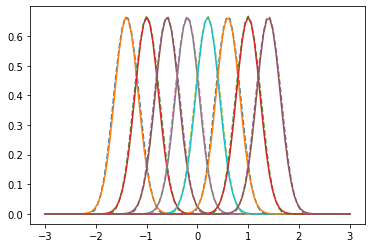

In [6]:
for i in range(8):
    plt.plot(x.numpy(), basis[0, :, i].numpy(), "--")
    plt.plot(x.numpy(), rbf_basis[:, i].numpy() * .6631)

Conclusion: Gaussian Radial Basis Functions can well approximate 3-order B-Spline basis with linear scalings.